# Part 4 - Feature Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get data
import pandas as pd

# df = pd.read_csv('.../prepared_data.csv')
df = pd.read_csv('/content/drive/MyDrive/OOP/make_me_data_science_v.csv')
print(df.shape)
print(df.info())
df.head()

(1000, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   binary                             1000 non-null   int64  
 1   given_name                         1000 non-null   float64
 2   surname                            1000 non-null   float64
 3   date_of_birth                      1000 non-null   float64
 4   phone_number                       1000 non-null   float64
 5   email                              1000 non-null   float64
 6   address                            1000 non-null   float64
 7   city                               1000 non-null   float64
 8   state                              1000 non-null   float64
 9   zipcode                            1000 non-null   float64
 10  informative_2                      1000 non-null   float64
 11  multicollinearity 3                1000 non-nu

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,random choice 4_West,random label num 3_label num lo 2,random label num 3_label num lo 3,semi_constant_1_q_const_0_1,semi_constant_1_q_const_0_2,semi_constant_2_q_const_0_1,semi_constant_2_q_const_0_2,pd qcut2_Q2,pd qcut2_Q3,pd qcut2_Q4
0,0,0.018,0.001,0.001,0.001,0.001,0.001,0.001,0.391,0.001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.016,0.002,0.001,0.001,0.201,0.157,0.292,0.391,0.290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.007,0.515,0.001,0.001,0.001,0.001,0.001,0.012,0.001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.011,0.001,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.017,0.001,0.001,0.001,0.201,0.001,0.292,0.014,0.001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [ ]:
# seed
import random

seed_id = 11809300
random_state = random.seed(seed_id)
random_state

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=random_state)
X_train.shape, X_test.shape

((700, 42), (300, 42))

### Mutual Information

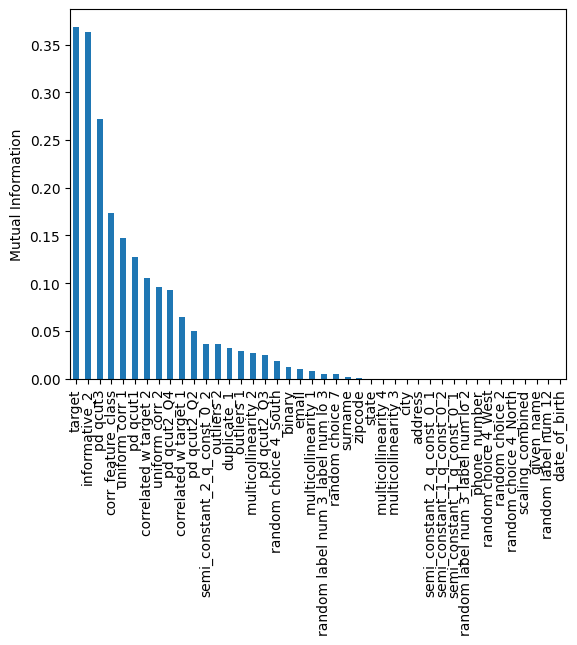

In [ ]:
# mutual information
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [ ]:
mi_keepers = mi.sort_values(ascending=False).index[:5]
print(mi_keepers)

Index(['target', 'informative_2', 'pd qcut3', 'corr_feature_class',
       'uniform corr 1'],
      dtype='object')


### SelectKBest

In [ ]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

selector = SelectKBest(f_classif, k=5) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['informative_2' 'uniform corr 1' 'target' 'pd qcut1' 'pd qcut3']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Select From Model

In [ ]:
# Select from model
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

selections = SelectFromModel(estimator=LogisticRegression()).fit(X_scaled, y_train)
mt_keepers = X_train.columns.values[selections.get_support()]
print(mt_keepers)

['address' 'city' 'informative_2' 'multicollinearity 3' 'duplicate_1'
 'target' 'uniform corr 2' 'corr_feature_class' 'correlated w target 2'
 'scaling_combined' 'random label num 3_label num lo 2'
 'semi_constant_2_q_const_0_2' 'pd qcut2_Q2' 'pd qcut2_Q4']


### Recursive Feature Elmination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=5) # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y_train)
rf_keepers = X_train.columns.values[selections.get_support()]
print(rf_keepers)

['address' 'city' 'informative_2' 'multicollinearity 3' 'duplicate_1'
 'target' 'uniform corr 2' 'corr_feature_class' 'correlated w target 2'
 'scaling_combined' 'random label num 3_label num lo 2'
 'semi_constant_2_q_const_0_2' 'pd qcut2_Q2' 'pd qcut2_Q4']


### Review Pickled Variables

* Correlated features
* VIF
* Outliers

### Random Forest Importance


In [ ]:
# random forest importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=random_state), max_features=4)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['informative_2', 'target', 'corr_feature_class', 'pd qcut3']

Scenario: We are trying to classify if a user will subscribe to our YouTube channel.

Lets grab the first four features from feature importance and rename them using the following suggestions:

**Numerical Features**

*   **Watch Time (seconds)**: Measures the total time viewers spend watching your videos.
*   **Average View Duration (seconds)**: The average length of time viewers watch a single video.
*   **Click-Through Rate (CTR)**: The percentage of viewers who click on your video after seeing the thumbnail/title.
*   **Comments per Video**: The number of comments on each video.
*   **Shares per Video**: The number of times each video is shared.
*   **Likes per Video**: The number of likes on each video.
*   **Dislikes per Video**: The number of dislikes on each video.
*   **Subscribers Gained per Video**: The number of subscribers gained after a video is published.
*   **Views per Video**: The total number of views for each video.

**Categorical Features**

*   **Video Category**: The category or genre of the video (e.g., tutorial, review, vlog).
*   **Upload Frequency**: How often you upload videos (e.g., daily, weekly, monthly).
*   **Video Length**: Categorize videos based on length (e.g., short, medium, long).
*   **Thumbnail Type**: The type of thumbnail used (e.g., image, text overlay, face).
*   **Use of Background Music**: Whether the video uses background music or not.
*   **Use of End Screens**: Whether the video includes end screens or not.
*   **Viewer Gender**: The dominant gender of your viewers (if available).
*   **Viewer Age**: The dominant age group of your viewers (if available).
*   **Viewer Location**: The primary location of your viewers (if available).

**Discrete Features**

*   **Number of Videos Uploaded**: The total number of videos on your channel.
*   **Channel Age (months)**: The age of your YouTube channel.
*   **Number of Playlists**: The total number of playlists on your channel.
*   **Use of Subtitles**: Whether your videos include subtitles (0 or 1).
*   **Use of Closed Captions**: Whether your videos include closed captions (0 or 1).
*   **Viewer Engagement Level**: Categorize viewer engagement into levels (e.g., low, medium, high).
*   **Video Quality**: Categorize video quality (e.g., low, medium, high).
*   **Subscriber Count**: The total number of subscribers to your channel.





In [ ]:
features_to_model = rfi
X_train[features_to_model].head()

,informative_2,target,corr_feature_class,pd qcut3
923,-0.742692,-1.134190,3.901993,0.172
557,-1.742479,-3.097403,3.842476,0.285
181,0.443645,1.416855,2.248311,0.285
933,1.105313,2.231462,2.344319,0.285
347,-0.365368,-0.292250,-2.357435,0.176


In [ ]:
new_column_names = {rfi[0]: 'watch_time', rfi[1]: 'avg_view_duration', rfi[2]: 'click_through_rate', rfi[3]: 'interest'}
X_train.rename(columns=new_column_names, inplace=True)
X_test.rename(columns=new_column_names, inplace=True)
features_to_model = list(new_column_names.values())
X_train = X_train[features_to_model]
X_test = X_test[features_to_model]

In [ ]:
import pickle

# Save the data
with open('/train_test_split.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

In [ ]:
import shutil

# Source file path (within your Drive)
source_file = 'train_test_split.pkl'

# Destination path (root of your Drive)
destination_path = '/content/drive/MyDrive/Colab Notebooks/train_test_split.pkl'

# Copy the file
shutil.copy(source_file, destination_path)